# Data Preprocess
We found that the original data set does not have a well-structured file name and some of photos need to be white-balanced because of background and light condition

In [1]:
import os
import cv2 as cv
import json
import pandas as pd
import numpy as np

## Rename the file name

In [3]:
datadir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\img"
jsdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\ann"
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\preprocessed"
path=os.path.join(datadir)
jsp=os.path.join(jsdir)
test_jslist=os.listdir(jsp)
test_list=os.listdir(path)

In [4]:
for i in test_jslist:
    try:
        with open(jsdir+"\\"+i,"r") as ison:
            idc=json.load(ison)
            name=i.split(".")[0]
            #print(idc["description"][:6],name)
            pname=name+".png"
        src=os.path.join(datadir,pname)
        dst=os.path.join(picsvdir,idc["description"]+".png")
        os.rename(src,dst)
    except:
        pass

KeyboardInterrupt: 

In [ ]:
datadir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\test\\img"
jsdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\test\\ann"
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\test\\preprocessed"
path=os.path.join(datadir)
jsp=os.path.join(jsdir)
test_jslist=os.listdir(jsp)
test_list=os.listdir(path)
for i in test_jslist:
    try:
        with open(jsdir+"\\"+i,"r") as ison:
            idc=json.load(ison)
            name=i.split(".")[0]
            #print(idc["description"][:6],name)
            pname=name+".png"
        src=os.path.join(datadir,pname)
        dst=os.path.join(picsvdir,idc["description"]+".png")
        os.rename(src,dst)
    except:
        pass

In [ ]:
datadir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\val\\img"
jsdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\val\\ann"
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\val\\preprocessed"
path=os.path.join(datadir)
jsp=os.path.join(jsdir)
test_jslist=os.listdir(jsp)
test_list=os.listdir(path)
for i in test_jslist:
    try:
        with open(jsdir+"\\"+i,"r") as ison:
            idc=json.load(ison)
            name=i.split(".")[0]
            #print(idc["description"][:6],name)
            pname=name+".png"
        src=os.path.join(datadir,pname)
        dst=os.path.join(picsvdir,idc["description"]+".png")
        os.rename(src,dst)
    except:
        pass

## Resize the image

### check the size of the image

In [2]:
from PIL import Image
name_list=[]
width_list=[]
height_list=[]
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\preprocessed"
for i in os.listdir(picsvdir):
    img=Image.open(picsvdir+"\\"+i)
    width,height=img.size
    width_list.append(width)
    height_list.append(height)
    name_list.append(i.split(".")[0])
info_df=pd.DataFrame({"name":name_list,"width":width_list,"height":height_list})

In [4]:
info_df.describe()

,width,height
count,47738.000000,47738.000000
mean,241.426327,52.120805
std,88.402524,19.195408
min,59.000000,13.000000
25%,170.000000,37.000000
50%,230.000000,50.000000
75%,301.000000,65.000000
max,882.000000,191.000000


<Axes: xlabel='width'>

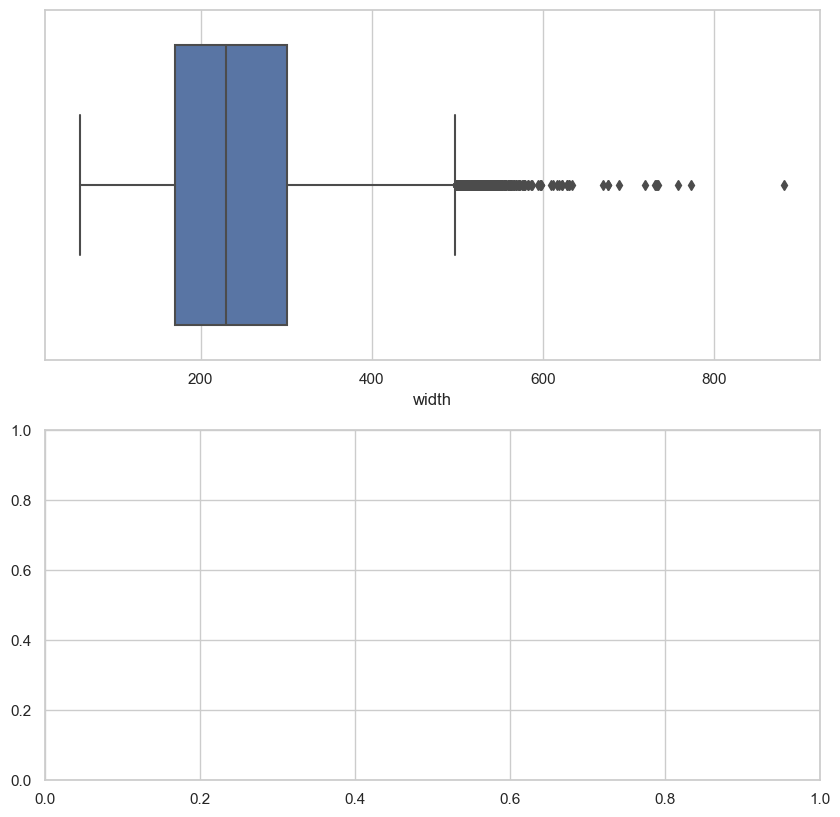

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
f,ax=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x="width",data=info_df,ax=ax[0])
sns.boxplot(x="height",data=info_df,ax=ax[1])